<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data_multi_delta_(0)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,0.608012,79.462532,78.758857,0.703676
1,0.0,1.0,57.329540,-1.487630,65.841910,67.199629,-1.357719
2,0.0,2.0,45.215694,-1.465021,53.750673,55.049786,-1.299113
3,0.0,3.0,69.375325,-0.710978,78.664347,79.281209,-0.616862
4,0.0,4.0,87.837297,0.844289,98.681586,97.798042,0.883544
...,...,...,...,...,...,...,...
19995,999.0,15.0,26.218063,-0.198479,36.019585,35.439986,0.579599
19996,999.0,16.0,28.641190,-0.742072,37.899118,37.907987,-0.008870
19997,999.0,17.0,27.129084,0.244542,37.373626,36.367878,1.005748
19998,999.0,18.0,74.603877,0.675226,85.279103,84.721873,0.557230


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,0.608012,79.462532,78.758857,0.703676
1,0.0,1.0,57.329540,-1.487630,65.841910,67.199629,-1.357719
2,0.0,2.0,45.215694,-1.465021,53.750673,55.049786,-1.299113
3,0.0,3.0,69.375325,-0.710978,78.664347,79.281209,-0.616862
4,0.0,4.0,87.837297,0.844289,98.681586,97.798042,0.883544
...,...,...,...,...,...,...,...
19995,999.0,15.0,26.218063,-0.198479,36.019585,35.439986,0.579599
19996,999.0,16.0,28.641190,-0.742072,37.899118,37.907987,-0.008870
19997,999.0,17.0,27.129084,0.244542,37.373626,36.367878,1.005748
19998,999.0,18.0,74.603877,0.675226,85.279103,84.721873,0.557230


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    68.854520  0.608012  79.462532  78.758857  0.703676
      1.0    57.329540 -1.487630  65.841910  67.199629 -1.357719
      2.0    45.215694 -1.465021  53.750673  55.049786 -1.299113
      3.0    69.375325 -0.710978  78.664347  79.281209 -0.616862
      4.0    87.837297  0.844289  98.681586  97.798042  0.883544
...                ...       ...        ...        ...       ...
999.0 15.0   26.218063 -0.198479  36.019585  35.439986  0.579599
      16.0   28.641190 -0.742072  37.899118  37.907987 -0.008870
      17.0   27.129084  0.244542  37.373626  36.367878  1.005748
      18.0   74.603877  0.675226  85.279103  84.721873  0.557230
      19.0   71.627276 -0.429322  81.197954  81.690147 -0.492193

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    68.854520  0.608012  79.462532  78.758857  0.703676
      1.0    57.329540 -1.487630  65.841910  67.199629 -1.357719
      2.0    45.215694 -1.465021  53.750673  55.049786 -1.299113
      3.0    69.375325 -0.710978  78.664347  79.281209 -0.616862
      4.0    87.837297  0.844289  98.681586  97.798042  0.883544
...                ...       ...        ...        ...       ...
999.0 15.0   26.218063 -0.198479  36.019585  35.439986  0.579599
      16.0   28.641190 -0.742072  37.899118  37.907987 -0.008870
      17.0   27.129084  0.244542  37.373626  36.367878  1.005748
      18.0   74.603877  0.675226  85.279103  84.721873  0.557230
      19.0   71.627276 -0.429322  81.197954  81.690147 -0.492193

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,0.608012,79.462532,78.758857,0.703676
1,0.0,1.0,57.329540,-1.487630,65.841910,67.199629,-1.357719
2,0.0,2.0,45.215694,-1.465021,53.750673,55.049786,-1.299113
3,0.0,3.0,69.375325,-0.710978,78.664347,79.281209,-0.616862
4,0.0,4.0,87.837297,0.844289,98.681586,97.798042,0.883544
...,...,...,...,...,...,...,...
19995,999.0,15.0,26.218063,-0.198479,36.019585,35.439986,0.579599
19996,999.0,16.0,28.641190,-0.742072,37.899118,37.907987,-0.008870
19997,999.0,17.0,27.129084,0.244542,37.373626,36.367878,1.005748
19998,999.0,18.0,74.603877,0.675226,85.279103,84.721873,0.557230


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    68.854520  0.608012  79.462532  78.758857  0.703676
      1.0    57.329540 -1.487630  65.841910  67.199629 -1.357719
      2.0    45.215694 -1.465021  53.750673  55.049786 -1.299113
      3.0    69.375325 -0.710978  78.664347  79.281209 -0.616862
      4.0    87.837297  0.844289  98.681586  97.798042  0.883544
...                ...       ...        ...        ...       ...
999.0 15.0   26.218063 -0.198479  36.019585  35.439986  0.579599
      16.0   28.641190 -0.742072  37.899118  37.907987 -0.008870
      17.0   27.129084  0.244542  37.373626  36.367878  1.005748
      18.0   74.603877  0.675226  85.279103  84.721873  0.557230
      19.0   71.627276 -0.429322  81.197954  81.690147 -0.492193

[20000 rows x 5 columns]

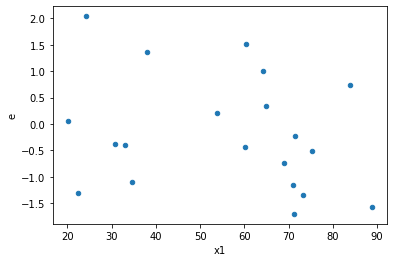

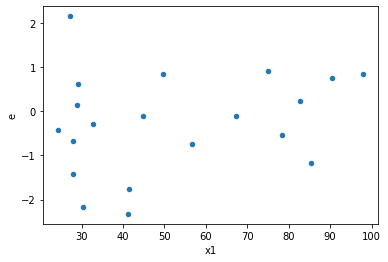

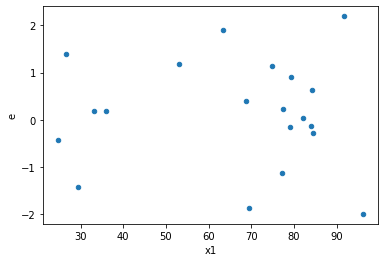

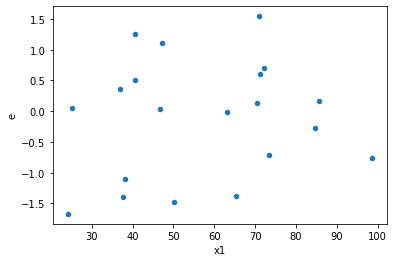

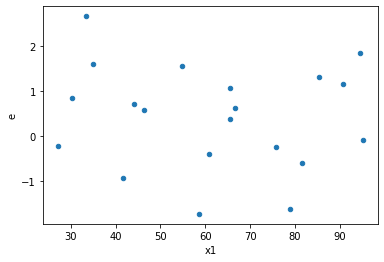

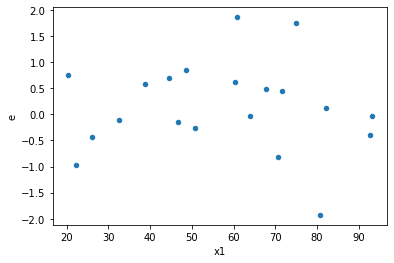

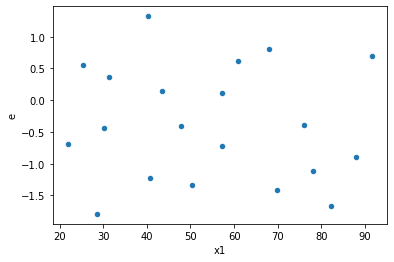

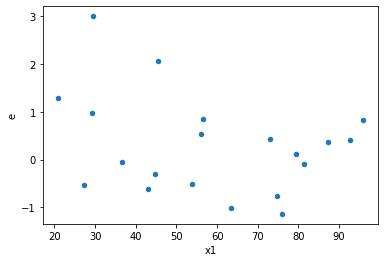

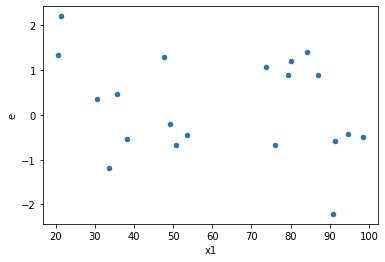

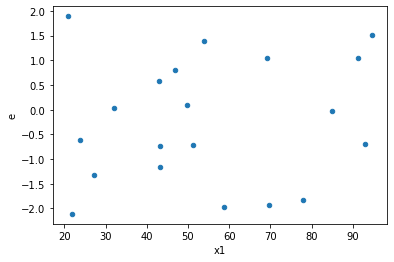

In [13]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x1')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,7.0,7.0,9.477356118686288,11.726850411058198,1.353908016955184,1.6752643444368853,1.2373546233993078,0.7858976614824429,0.6070511692587786,0.39294883074122144,Reject005=1 : Homoscedasticity
3.0,7.0,7.0,2.1436592177890263,10.56881007521892,0.30623703111271805,1.50983001074556,4.930265961825596,0.05172584403422631,0.9741370779828868,0.025862922017113155,Reject005=1 : Homoscedasticity
4.0,7.0,7.0,3.6436938774460486,5.343787499897404,0.5205276967780069,0.7633982142710577,1.4665851961315124,0.625948151687258,0.687025924156371,0.312974075843629,Reject005=1 : Homoscedasticity
6.0,7.0,7.0,5.383993369111716,7.526109959440299,0.7691419098731023,1.0751585656343283,1.397867613028283,0.66963851690928,0.66518074154536,0.33481925845464,Reject005=1 : Homoscedasticity
8.0,7.0,7.0,6.89069797279979,10.957315501577249,0.9843854246856844,1.5653307859396068,1.590160466302535,0.5554482812878385,0.7222758593560807,0.27772414064391926,Reject005=1 : Homoscedasticity
9.0,7.0,7.0,5.048775160957206,7.441239564907255,0.721253594422458,1.0630342235581793,1.4738702611380416,0.6215126034402276,0.6892436982798862,0.3107563017201138,Reject005=1 : Homoscedasticity
12.0,7.0,7.0,5.900247264287439,9.37479773620698,0.8428924663267771,1.33925681945814,1.5888821800655764,0.5561282167346411,0.7219358916326795,0.27806410836732054,Reject005=1 : Homoscedasticity
15.0,7.0,7.0,2.465357909837555,7.594742216291648,0.3521939871196507,1.0849631737559498,3.080584034466652,0.16083294722416253,0.9195835263879187,0.08041647361208126,Reject005=1 : Homoscedasticity
20.0,7.0,7.0,4.150785079232425,5.12339339705806,0.5929692970332036,0.7319133424368658,1.2343191225900554,0.7883034789093268,0.6058482605453366,0.3941517394546634,Reject005=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,7.692780950612038,7.520747658822993,1.0989687072302912,1.074392522688999,0.9776370479162859,0.9769661588149849,Reject005=1 : Homoscedasticity
1.0,7.0,7.0,9.477356118686288,11.726850411058198,1.353908016955184,1.6752643444368853,1.2373546233993078,0.7858976614824429,Reject005=1 : Homoscedasticity
2.0,7.0,7.0,11.074102240451584,0.40810823065376756,1.5820146057787976,0.05830117580768108,0.036852488968634044,0.0002940110539357292,Reject005=0 : Heteroscedasticity
3.0,7.0,7.0,2.1436592177890263,10.56881007521892,0.30623703111271805,1.50983001074556,4.930265961825596,0.05172584403422631,Reject005=1 : Homoscedasticity
4.0,7.0,7.0,3.6436938774460486,5.343787499897404,0.5205276967780069,0.7633982142710577,1.4665851961315124,0.625948151687258,Reject005=1 : Homoscedasticity
5.0,7.0,7.0,10.919420340756535,4.320997204401166,1.5599171915366479,0.6172853149144524,0.3957167202615256,0.24441025691037846,Reject005=1 : Homoscedasticity
6.0,7.0,7.0,5.383993369111716,7.526109959440299,0.7691419098731023,1.0751585656343283,1.397867613028283,0.66963851690928,Reject005=1 : Homoscedasticity
7.0,7.0,7.0,5.333220308519597,4.449937525236172,0.7618886155027996,0.6357053607480246,0.8343809683105688,0.8173155957560169,Reject005=1 : Homoscedasticity
8.0,7.0,7.0,6.89069797279979,10.957315501577249,0.9843854246856844,1.5653307859396068,1.590160466302535,0.5554482812878385,Reject005=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      917
Reject005=0 : Heteroscedasticity     83
Name: Result_test, dtype: int64